# <span style="color:blue">0. Definições </span>

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

## Definição de funções para fazer gráficos que utilizaremos recursivamente

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: MaxNLocator.set_params got an unexpected parameter: nticks
  # This is added back by InteractiveShellApp.init_path()


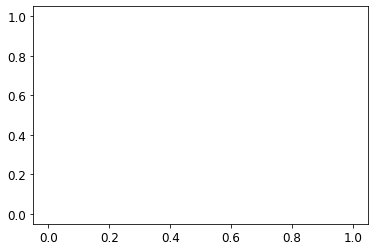

In [2]:
#****************************
#GRAFICOS
#****************************
#Ajsutando fontes padrão dos gráficos
font = { 'weight' : 'normal',
        'size'   : 12}

plt.rc('font', **font)
#Ajsutando espessura das linhas padrão dos gráficos
plt.rcParams['lines.linewidth'] = 2;
plt.locator_params(nticks=4);
# plt.locator_params(nticks=4);

In [3]:
#****************************
#FUNÇÃO PARA GRAFICAR DIAGRAMA DE ARGAND (PLANO COMPLEXO)
#****************************
def z_plot(zlist,scale_factor=1.1):
    ''' FUNÇÃO PARA GRAFICAR NÚMERO COMPLEXO NO DIAGRAMA DE ARGAND, CARTESIANO E POLAR
    entrada: 
    zlist = lista contendo um ou mais números (array ou numpy.array)
    obs: se quiser apenas um número, coloque colchetes, [z]
    scale_factor (opcional) = fator de escala para definir o excesso dos eixos
    saída: figura matplotlib  
    '''
    fig, ax = plt.subplots(2, figsize=(10,5));
    #----------------------
    #GRÁFICO CARTESIANO
    ax[0] = plt.subplot(1,2,1) # primeiro grafico de uma matrix 1x2
    for z in zlist:
        ax[0].plot([0,z.real],[0,z.imag],'.--k'); # desenha uma linha tracejada da origem até ponto
        ax[0].plot(z.real,z.imag,'o',markersize = 10) #desenha o ponto
    zmax = scale_factor*np.max(np.abs(zlist))
    ax[0].plot(zmax*np.array([0,0]),zmax*np.array([-1,1]),'-k')#eixos cartesianos
    ax[0].plot(zmax*np.array([-1,1]),zmax*np.array([0,0]),'-k')#eixos cartesianos
    ax[0].set_xlim([-zmax,zmax]);
    ax[0].set_ylim([-zmax,zmax]);
    ax[0].set_xlabel('parte real');
    ax[0].set_ylabel('parte imaginária');
    plt.title('Diagrama de Argand');
    ax[0].grid(True);
    #----------------------
    #GRÁFICO POLAR
    ax[1] = plt.subplot(1,2,2,projection='polar') # primeiro grafico de uma matrix 1x2
    count = 1
    for z in zlist:
        ax[1].plot([0,np.angle(z)],[0,np.abs(z)],'.--k'); # desenha uma linha tracejada da origem até ponto
        ax[1].plot(np.angle(z),np.abs(z),'o', markersize = 10,  label = 'z'+str(count)) #desenha o ponto
        count = count+1
    #ax[1].set_rmax(scale_factor*np.array([-np.abs(z),np.abs(z)]));
    plt.title('Diagrama de Argand (Forma polar)');
    ax[1].grid(True);
    ax[1].set_rlabel_position(0)
    ax[1].set_rmax(zmax)
    #ax[1].legend(loc='lower right')
    ax[1].legend(loc=(1.2,0.45))
    return fig; # retorna a figura
#-------------------------------------------

In [4]:
#****************************
#FUNÇÃO PARA GRAFICAR DIAGRAMA DE BODE (|H|**2 E ARG(H)
#****************************
def fig_bode(freq,Tdbvec,fasevec,labelvec):
    '''Função para graficar painel 2x1 com diagrama de Bode (amplitude e fase)
    entrada:
    freq (vetor numérico de frequência)
    Tdbvec (vetor numérico)
    '''
    fig, ax = plt.subplots(2, sharex=True, figsize=(5, 10));
    #--------------------------------------
    #TRANSMITANCIA EM DECIBEIS
    ax[0] = plt.subplot(211)
    for m in range(np.shape(Tdbvec)[0]):
        ax[0].plot(freq,np.array(Tdbvec)[m,:],'-*',linewidth=2,label=labelvec[m])
        #ax[0].plot(freq,np.array(Tdbvec)[m,:],,label=labelvec[m])
    ax[0].set_ylim((-40,30))
    ax[0].set_xscale('log')
    ax[0].set_ylabel('T (dB)')
    ax[0].legend(loc='lower right')
    ax[0].grid(True)
    #--------------------------------------
    ax[1] = plt.subplot(212)
    for m in range(np.shape(fasevec)[0]):
        ax[1].plot(freq,np.array(fasevec)[m,:],'-*',linewidth=2,label=labelvec[m])
    ax[1].set_ylim([-200,200])
    ax[1].set_xscale('log')
    ax[1].set_ylabel('Fase (graus)')
    ax[1].grid(True)
    #--------------------------------------
    #geral
    ax[0].set_title('Diagrama de Bode')
    plt.xlabel('Frequência (Hz)')
    return fig

# <span style="color:blue">1. Impedâncias complexas</span>

Abaixo, definimos as impedâncias complexas para o capacitor, para o capacitor: $$Z_c=-j X_c=-j \frac{1}{\omega C}=-j \frac{1}{2\pi f C},$$ sendo $f$ a frequência (em [Hz]). 

Para o indutor, $$Z_l=j X_l=j \omega L=j 2\pi f L,$$ sendo $f$ a frequência (em [Hz]).

In [5]:
#-----------------
#CAPACITOR
def Zc(freq,C):
    j = complex(0,1)
    #reatancia
    Xc = 1/(2*np.pi*freq*C)
    #impedancia complexa
    Zc = -j*Xc
    return Zc
#-----------------
#INDUTOR
def Zl(freq,L):
    j = complex(0,1)
    #reatancia
    Xl = 2*np.pi*freq*L
    #impedancia complexa
    Zl = j*Xl
    return Zl

A impedância de cada um dos componentes é __puramente reativo__, não possui parte real:

Pergunta: Quais os valores possíveis para a fase das impedâncias de componentes __puramente reativos__?

impedância complexa capacitor, Zc= 0-2j
impedância complexa indutor, Zl= 0+6e+01j


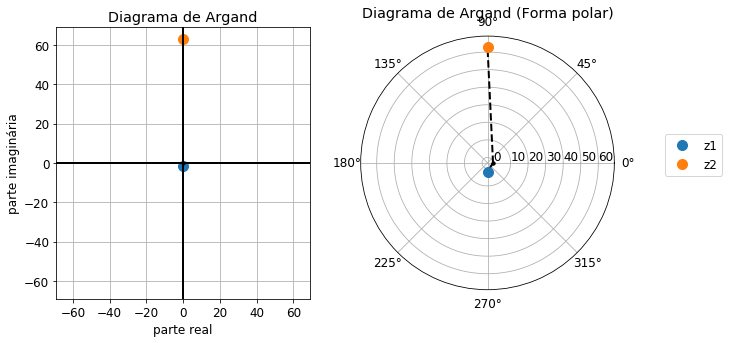

In [6]:
#definindo valores dos componentes
freq = 1000 # frequencia [Hz]
C = 90e-6; #capacitancia [F]
L = 10e-3; # indutancia  [H]
#calculando
print('impedância complexa capacitor, Zc= {:1.1g}'.format(Zc(freq,C)))
print('impedância complexa indutor, Zl= {:1.1g}'.format(Zl(freq,L)))
#graficando:
test=z_plot([Zc(freq,C),Zl(freq,L)])

Já para o circuito $RC$ ou $RL$ série, a __impedância total possui parte real e imaginária__. <span style="color:red">Note que o $RC$ possui parte imaginária negativa ($\mathcal{Im}(Z)<0$, _capacitivo_) e o $RL$ possui parte imaginária positivo ($\mathcal{Im}(Z)>0$, _indutivo_), </span>

(100-318.3098861837907j)
(100+157.07963267948966j)


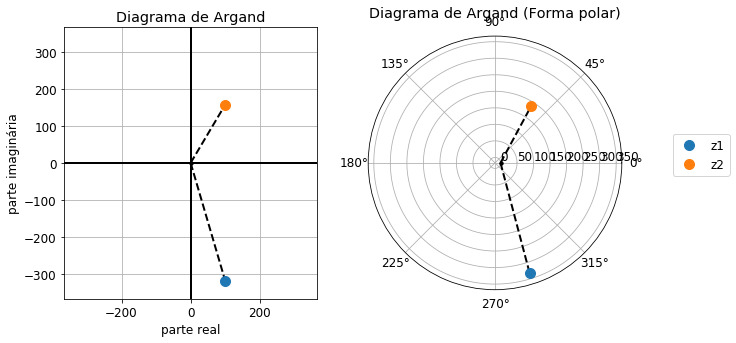

In [15]:
#definindo valores dos componentes
freq = 500 # frequencia [Hz]
C = 1e-6; #capacitancia [F]
L = 50e-3; # indutancia  [H]
R = 100; #resistencia [Ohms]
#impedancia total de um circuito RC ou RL
print(R + Zc(freq,C))
print(R + Zl(freq,L))
#graficando:
z_plot([R+Zc(freq,C),R+Zl(freq,L)]);

Já para o circuito $RLC$ série, dependendo da frequência, ele pode ser mais indutivo $\mathcal{Im}(Z)>0$ ou capacitivo $\mathcal{Im}(Z)<0$.  Altere o valor da frequência (```freq```) e verifique este comportamento.

(100-1560.1335043830557j)


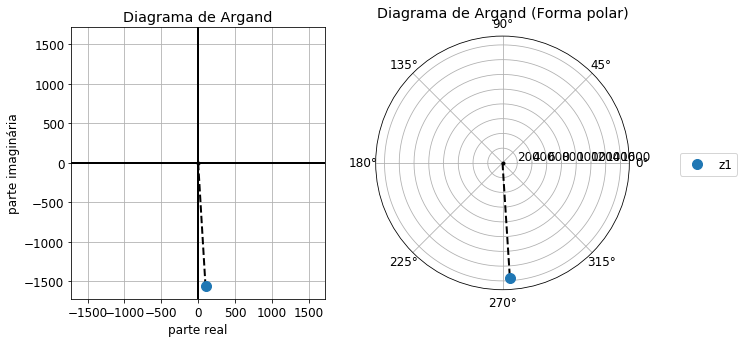

In [6]:
#definindo valores dos componentes
freq = 100 # frequencia [Hz]
C = 1e-6; #capacitancia [F]
L = 50e-3; # indutancia  [H]
R = 100; #resistencia [Ohms]
#impedancia total de um circuito RC ou RL
print(R + Zl(freq,L) + Zc(freq,C))
z_plot([R + Zl(freq,L) + Zc(freq,C)]);

## Forma polar 

### Note a importância de usar a função ```np.angle``` (argumento), ao invés de usar o ```np.arctan``` (arco-tangente)

No primeiro quadrante...

(-1+1j)
-1.0
1.0
-45.0
135.0


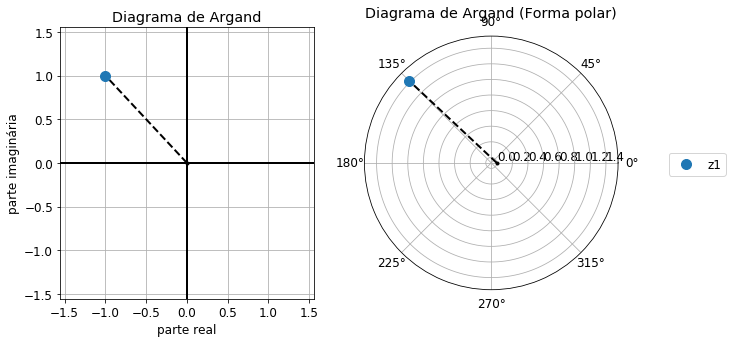

In [16]:
z = -1 + complex(0,1)
print(z)
print(z.real)
print(z.imag)
#calculando a fase (em graus):
fase_atan = (180/np.pi)*np.arctan(z.imag/z.real)
print(fase_atan)
fase_angle = (180/np.pi)*np.angle(z)
print(fase_angle)
#graficando
z_plot([z]);

No segundo quadrante...

In [ ]:
z = -0.5 + complex(0,1)
print(z)
print(z.real)
print(z.imag)
#calculando a fase (em graus):
fase_atan = (180/np.pi)*np.arctan(z.imag/z.real)
print(fase_atan)
fase_angle = (180/np.pi)*np.angle(z)
print(fase_angle)
#graficando
z_plot([z]);

###  Convertendo entre as duas formas:

$$z=a+jb\rightarrow z=|z|\exp(j\theta),$$
sendo que $\theta=arg(z)$

In [ ]:
z = -0.5 + complex(0,1)
print('forma cartesiana:',z)
print('parte real:',z.real)
print('parte imaginaria:',z.imag)
#fase
theta = np.angle(z)
print('fase (rad)',theta)
#modulo
zabs = np.abs(z)
print('módulo',zabs)
#FORMA POLAR
j=complex(0,1)
zpolar = zabs* np.exp(j*theta)
print('forma polar:',zpolar)
#---------------------------------------
#Grafico representando o número complexo
#graficando
z_plot([z]);

In [ ]:
j=complex(0,1)
r1, theta1 = 1.5, np.pi/2
r2, theta2 = 1.0, np.pi/4
z1 = r1*np.exp(j*theta1)
z2 = r2*np.exp(j*theta2)
z3  = z1*z2
z4 = z2/z1
z_plot([z1,z2,z3,z4]);

## Graficando as impedâncias dos componentes reativos

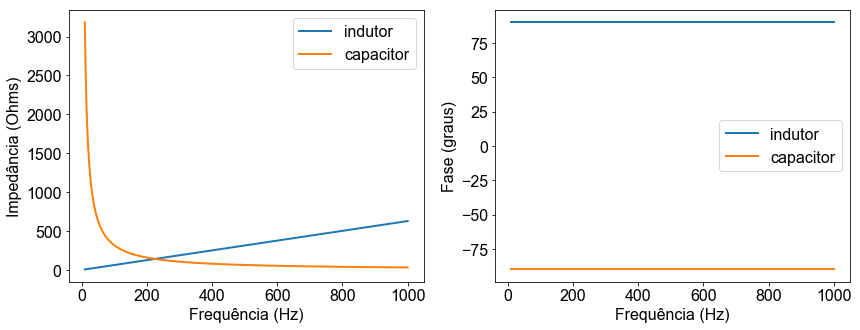

In [7]:
freq=np.linspace(10,1000,500) # vetor que vai de 10**0 até 10**6
C=5e-6; 
L=100e-3;
#-----
#GRAFICOS
#Ajsutando fontes padrão dos gráficos
font = {'family' : 'arial',
        'weight' : 'normal',
        'size'   : 16} #este tipo de variável é um dicionário
plt.rc('font', **font)
plt.rcParams['lines.linewidth'] = 2

#Ajsutando espessura das linhas padrão dos gráficos
#IMPEDÂNCIA,|Z|
fig, ax = plt.subplots(2,figsize=(14, 5))
ax[0] = plt.subplot(121)
ax[0].plot(freq,np.abs(Zl(freq,L)),label='indutor')
ax[0].plot(freq,np.abs(Zc(freq,C)),label='capacitor')
#nome dos eixos e legendas
ax[0].set_xlabel('Frequência (Hz)')
ax[0].set_ylabel('Impedância (Ohms)')
ax[0].legend(loc='upper right')
#-----
#FASE,arg(Z)
ax[1] = plt.subplot(122)
ax[1].plot(freq,np.angle(Zl(freq,L),deg=True),label='indutor')
ax[1].plot(freq,np.angle(Zc(freq,C),deg=True),label='capacitor')
#nome dos eixos e legendas
ax[1].set_xlabel('Frequência (Hz)')
ax[1].set_ylabel('Fase (graus)')
ax[1].legend(loc='center right')

# <span style="color:blue">2. Circuitos contendo 1 componentes reativos, RC e RL</span>

### Abaixo definimos uma função para fazer diagramas de Bode

### circuito RC

In [16]:
freq=np.logspace(1,6,20) # vetor que vai de 10**0 até 10**6
#lomega=np.log10(omega)
C=1e-3;
L=1e-3/(2*np.pi)**2;
R=0.2;
#----------------
Zt = Zc(freq,C)+R # impedancia total
Hrc =  Zc(freq,C)/Zt # H com capacitor na saida
Hcr = R/Zt # H com resistor na saida

In [17]:
#----------------
Trc=np.abs(Hrc)
Trcdb=20*np.log10(Trc)
fase_rc = np.angle(Hrc,deg=True)
#capacitor
Tcr=np.abs(Hcr)
Tcrdb=20*np.log10(Tcr)
fase_cr = np.angle(Hcr,deg=True)

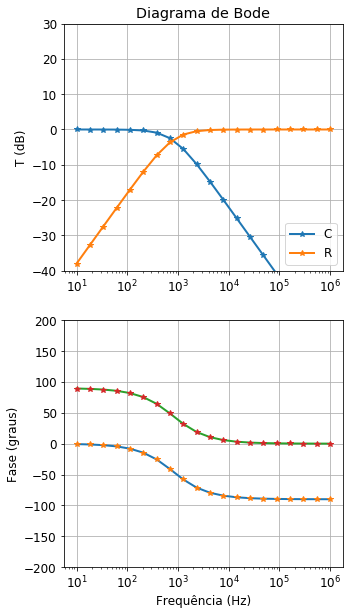

In [21]:
#GRAFICANDO BODE, RC e CR
fig=fig_bode(freq,[Trcdb,Tcrdb],[fase_rc,fase_cr],['C','R']);

In [ ]:
#SALVANDO FIGURA
#-----------------------------
print('pasta atual:',os.getcwd())  
name='bode_rc'
folder_path=os.getcwd()
ext='pdf'
path=os.path.join(folder_path,name + '.' + ext)
fig.savefig(path,format='pdf')
print('arquivo salvo:',path)

###  circuito RL

In [ ]:
freq=np.logspace(0,6,200) # vetor que vai de 10**0 até 10**6
#lomega=np.log10(omega)
C=1e-3;
L=1e-3/(2*np.pi)**2;
R=0.2;
#----------------
Zt = Zl(freq,L)+R
Hrl,Hlr = Zl(freq,L)/Zt, R/Zt
#----------------
Trl=np.abs(Hrl)
Trldb=20*np.log10(Trl)
fase_rl = np.angle(Hrl,deg=True)
#capacitor
Tlr=np.abs(Hlr)
Tlrdb=20*np.log10(Tlr)
fase_lr = np.angle(Hlr,deg=True)

In [ ]:
#GRAFICANDO BODE, LR e RL
fig=fig_bode(freq,[Trldb,Tlrdb],[fase_rc,fase_cr],['L','R']);

In [ ]:
#SALVANDO FIGURA
#-----------------------------
print('pasta atual:',os.getcwd())  
name='bode_rl'
folder_path=os.getcwd()
ext='pdf'
path=os.path.join(folder_path,name + '.' + ext)
fig.savefig(path,format='pdf')
print('arquivo salvo:',path)

## Circuitos contendo 2 componentes reativos, RLC

In [10]:
freq=np.logspace(0,6,500) # vetor que vai de 10**0 até 10**6
#lomega=np.log10(omega)
C=47e-9;
L=54.33e-3;
R=1e3;
#----------------
Zt = Zc(freq,C)+Zl(freq,L)+R # impedancia total
Hr = R/Zt # resistor na saida
Hc = Zc(freq,C)/Zt # capacitor na saida
Hl = Zl(freq,L)/Zt # indutor na saida
Hlc = (Zc(freq,C)+Zl(freq,L))/Zt # indutor e capacitor na saida
#----------------
Tr=np.abs(Hr)
Trdb=20*np.log10(Tr)
fase_r = np.angle(Hr,deg=True)
#capacitor
Tc=np.abs(Hc)
Tcdb=20*np.log10(Tc)
fase_c = np.angle(Hc,deg=True)
#indutor
Tl=np.abs(Hl)
Tldb=20*np.log10(Tl)
fase_l = np.angle(Hl,deg=True)
#indutor+capacitor
Tlc=np.abs(Hlc)
Tlcdb=20*np.log10(Tlc)
fase_lc = np.angle(Hlc,deg=True)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


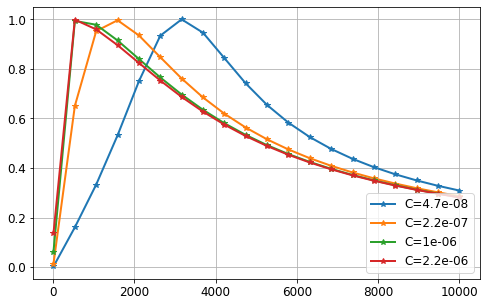

In [13]:
freq=np.linspace(10,10000,20) # vetor que vai de 10**0 até 10**6
#lomega=np.log10(omega)
fig, ax = plt.subplots(2, sharex=True, figsize=(8, 5));
for C in [47e-9,0.22e-6,1e-6,2.2e-6]:
    L=54.33e-3;
    R=1e3;
    #----------------
    Zt = Zc(freq,C)+Zl(freq,L)+R # impedancia total
    Hr = R/Zt # resistor na saida
    Hc = Zc(freq,C)/Zt # capacitor na saida
    Hl = Zl(freq,L)/Zt # indutor na saida
    Hlc = (Zc(freq,C)+Zl(freq,L))/Zt # indutor e capacitor na saida
    #----------------
    Tr=np.abs(Hr)
    Trdb=20*np.log10(Tr)
    fase_r = np.angle(Hr,deg=True)
    #--------------------------------------
    #TRANSMITANCIA EM DECIBEIS
    ax[0] = plt.subplot(111)
    ax[0].plot(freq,Tr,'-*',linewidth=2,label='C={:1g}'.format(C))
        #ax[0].plot(freq,np.array(Tdbvec)[m,:],,label=labelvec[m])
    #ax[0].set_ylim((-30,5))
    #ax[0].set_xscale('log')
    #ax[0].set_ylabel('T (dB)')
    ax[0].legend(loc='lower right')
    ax[0].grid(True)

In [ ]:
freq=np.logspace(0,6,500) # vetor que vai de 10**0 até 10**6
#lomega=np.log10(omega)
fig, ax = plt.subplots(2, sharex=True, figsize=(8, 5));
for C in [47e-9,0.22e-6,1e-6,2.2e-6]:
    L=54.33e-3;
    R=1e3;
    #----------------
    Zt = Zc(freq,C)+Zl(freq,L)+R # impedancia total
    Hr = R/Zt # resistor na saida
    Hc = Zc(freq,C)/Zt # capacitor na saida
    Hl = Zl(freq,L)/Zt # indutor na saida
    Hlc = (Zc(freq,C)+Zl(freq,L))/Zt # indutor e capacitor na saida
    #----------------
    Tr=np.abs(Hr)
    Trdb=20*np.log10(Tr)
    fase_r = np.angle(Hr,deg=True)
    #--------------------------------------
    #TRANSMITANCIA EM DECIBEIS
    ax[0] = plt.subplot(111)
    ax[0].plot(freq,Tr,'-*',linewidth=2,label='C={:1g}'.format(C))
        #ax[0].plot(freq,np.array(Tdbvec)[m,:],,label=labelvec[m])
    #ax[0].set_ylim((-30,5))
    ax[0].set_xscale('log')
    #ax[0].set_ylabel('T (dB)')
    ax[0].legend(loc='lower right')
    ax[0].grid(True)

/usr/local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


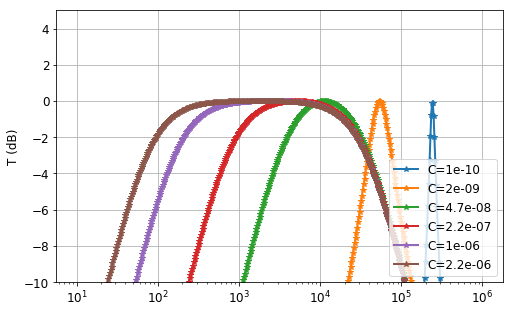

In [33]:
freq=np.logspace(1,6,500) # vetor que vai de 10**0 até 10**6
#lomega=np.log10(omega)
fig, ax = plt.subplots(2, sharex=True, figsize=(8, 5));
for C in [0.1e-9,2e-9,47e-9,0.22e-6,1e-6,2.2e-6]:
    L=4.33e-3;
    R=1e3;
    #----------------
    Zt = Zc(freq,C)+Zl(freq,L)+R # impedancia total
    Hr = R/Zt # resistor na saida
    Hc = Zc(freq,C)/Zt # capacitor na saida
    Hl = Zl(freq,L)/Zt # indutor na saida
    Hlc = (Zc(freq,C)+Zl(freq,L))/Zt # indutor e capacitor na saida
    #----------------
    Tr=np.abs(Hr)
    Trdb=20*np.log10(Tr)
    fase_r = np.angle(Hr,deg=True)
    #--------------------------------------
    #TRANSMITANCIA EM DECIBEIS
    ax[0] = plt.subplot(111)
    ax[0].plot(freq,Trdb,'-*',linewidth=2,label='C={:1g}'.format(C))
        #ax[0].plot(freq,np.array(Tdbvec)[m,:],,label=labelvec[m])
    ax[0].set_ylim((-10,5))
    ax[0].set_xscale('log')
    ax[0].set_ylabel('T (dB)')
    ax[0].legend(loc='lower right')
    ax[0].grid(True)

/usr/local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


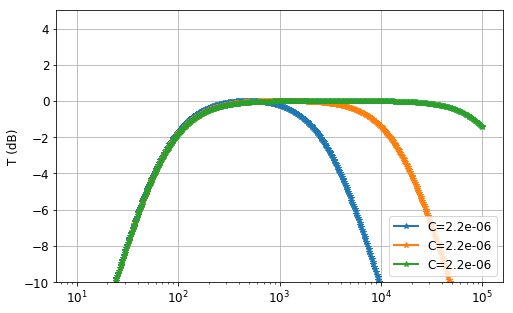

In [29]:
freq=np.logspace(1,5,500) # vetor que vai de 10**0 até 10**6
#lomega=np.log10(omega)
fig, ax = plt.subplots(2, sharex=True, figsize=(8, 5));
for L in [50e-3,10e-3,1e-3]:
    C=2.2e-6
    #L=4.33e-3;
    R=1e3;
    #----------------
    Zt = Zc(freq,C)+Zl(freq,L)+R # impedancia total
    Hr = R/Zt # resistor na saida
    Hc = Zc(freq,C)/Zt # capacitor na saida
    Hl = Zl(freq,L)/Zt # indutor na saida
    Hlc = (Zc(freq,C)+Zl(freq,L))/Zt # indutor e capacitor na saida
    #----------------
    Tr=np.abs(Hr)
    Trdb=20*np.log10(Tr)
    fase_r = np.angle(Hr,deg=True)
    #--------------------------------------
    #TRANSMITANCIA EM DECIBEIS
    ax[0] = plt.subplot(111)
    ax[0].plot(freq,Trdb,'-*',linewidth=2,label='C={:1g}'.format(C))
        #ax[0].plot(freq,np.array(Tdbvec)[m,:],,label=labelvec[m])
    ax[0].set_ylim((-10,5))
    ax[0].set_xscale('log')
    ax[0].set_ylabel('T (dB)')
    ax[0].legend(loc='lower right')
    ax[0].grid(True)

In [ ]:
freq=np.logspace(0,6,500) # vetor que vai de 10**0 até 10**6
#lomega=np.log10(omega)
C=47e-9;
L=54.33e-3;
R=1e3;
#----------------
Zt = Zc(freq,C)+Zl(freq,L)+R # impedancia total
Hr = R/Zt # resistor na saida
Hc = Zc(freq,C)/Zt # capacitor na saida
Hl = Zl(freq,L)/Zt # indutor na saida
Hlc = (Zc(freq,C)+Zl(freq,L))/Zt # indutor e capacitor na saida
#----------------
Tr1=np.abs(Hr)
Trdb1=20*np.log10(Tr1)
fase_r1 = np.angle(Hr,deg=True)

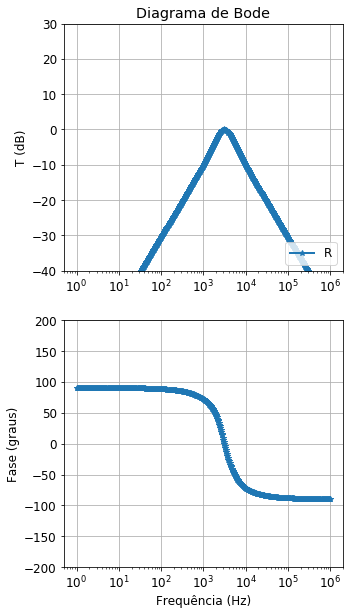

In [11]:
fig=fig_bode(freq,[Trdb,],[fase_r,],['R','L','C','LC']);

In [ ]:
#-----------------------------
print('pasta atual:',os.getcwd())  
name='bode_rlc'
folder_path=os.getcwd()
ext='pdf'
path=os.path.join(folder_path,name + '.' + ext)
fig.savefig(path,format='pdf')
print('arquivo salvo:',path)